In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
df=pd.read_csv(r"C:\Users\chaitanyamukthineni\Desktop\Ocular\Ocular DIsease Recognition\opular.csv")

In [3]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [4]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [5]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values

In [9]:
left_cataract

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg', '629_left.jpg',
       '691_left.jpg', '726_left.jpg', '750_left.jpg', '809_left.jpg',
       '820_left.jpg', '824_left.jpg', '874_left.jpg', '907_left.jpg',
       '970_left.jpg', '999_left.jpg', '1083_left.jpg', '1102_left.jpg',
       '1115_left.jpg', '1144_left.jpg', '1164_left.jpg', '1285_left.jpg',
       '1415_left.jpg', '1435_left.jpg', '1444_left.jpg', '1452_left.jpg',
       '1468_left.jpg', '1483_left.jpg', '1484_left.jpg', '1987_left.jpg',
       '1994_left.jpg', '2052_left.jpg', '2098_left.jpg', '2099_left.jpg',
       '2101_left.jpg', '2102_left.jpg', '2103_left.jpg', '2104_left.jpg',
       '2105_left.jpg', '2108_left.jpg', '2109_left.jpg', '2110_left.jpg',
       '2111_left.jpg', '2113_left.jpg', '2114_left.jp

In [10]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values

In [11]:
def has_diabetes(text):
    if "retinopathy" in text:
        return 1
    else:
        return 0

In [12]:
df["left_diabetes"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_diabetes(x))
df["right_diabetes"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_diabetes(x))

In [13]:
left_diabetes = df.loc[(df.D ==1) & (df.left_diabetes == 1)]["Left-Fundus"].sample(150,random_state=42).values

In [14]:
right_diabetes = df.loc[(df.D ==1) & (df.right_diabetes == 1)]["Right-Fundus"].sample(150,random_state=42).values

In [15]:
def has_glaucoma(text):
    if "glaucoma" in text:
        return 1
    else:
        return 0

In [16]:
df["left_glaucoma"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_glaucoma(x))
df["right_glaucoma"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_glaucoma(x))

In [17]:
left_glaucoma = df.loc[(df.G ==1) & (df.left_glaucoma == 1)]["Left-Fundus"].values

In [18]:
right_glaucoma = df.loc[(df.G ==1) & (df.right_glaucoma == 1)]["Right-Fundus"].values

In [19]:
def has_agedegen(text):
    if "degeneration" in text:
        return 1
    else:
        return 0

In [20]:
df["left_agedegen"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_agedegen(x))
df["right_agedegen"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_agedegen(x))

In [21]:
left_agedegen = df.loc[(df.A ==1) & (df.left_agedegen == 1)]["Left-Fundus"].values

In [22]:
right_agedegen = df.loc[(df.A ==1) & (df.right_agedegen == 1)]["Right-Fundus"].values

In [23]:
left_normal = df.loc[df["Left-Diagnostic Keywords"] == "normal fundus"]["Left-Fundus"].sample(150,random_state=42).values
right_normal = df.loc[df["Right-Diagnostic Keywords"] == "normal fundus"]["Right-Fundus"].sample(150,random_state=42).values


In [24]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
diabetes = np.concatenate((left_diabetes,right_diabetes),axis=0)
glaucoma = np.concatenate((left_glaucoma,right_glaucoma),axis=0)
agedegen = np.concatenate((left_agedegen,right_agedegen),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [25]:
len(cataract)

299

In [26]:
len(diabetes)

300

In [27]:
len(glaucoma)

309

In [28]:
len(agedegen)

275

In [29]:
len(normal)

300

In [30]:
import os

In [31]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "C:/Users/chaitanyamukthineni/Desktop/Ocular/Ocular DIsease Recognition/preprocessed_images/"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [32]:
dataset = create_dataset(normal,0)

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:06<00:00, 43.93it/s]


In [33]:
dataset = create_dataset(diabetes,1)

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:04<00:00, 74.17it/s]


In [34]:
dataset = create_dataset(cataract,2)

100%|███████████████████████████████████████████████████████████████████████████████| 299/299 [00:02<00:00, 141.73it/s]


In [35]:
dataset = create_dataset(glaucoma,3)

100%|████████████████████████████████████████████████████████████████████████████████| 309/309 [00:04<00:00, 63.40it/s]


In [36]:
dataset = create_dataset(agedegen,4)

100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [00:03<00:00, 76.23it/s]


In [37]:
len(dataset)

1470

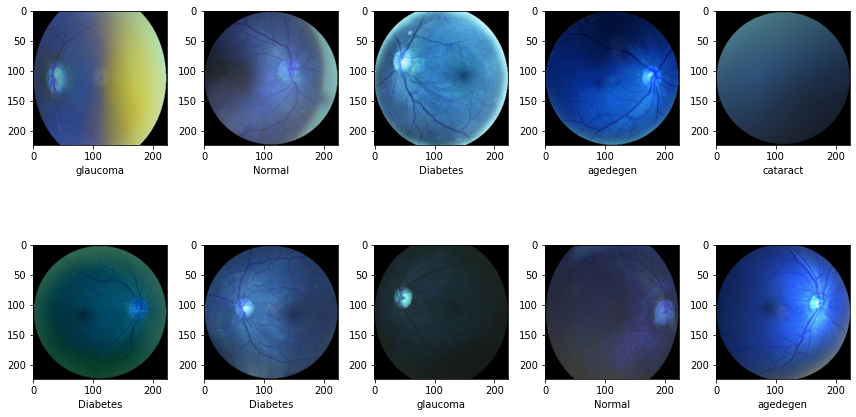

In [38]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    elif category==1:
        label = "Diabetes"
    elif category==2:
        label="cataract"
    elif category==3:
        label="glaucoma"
    else:
        label="agedegen"
    
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout() 

In [39]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [40]:
'''yp = []
for i in y:
    if(i==0):
        yp.append([0,0,0,0,1])
    elif(i==1):
        yp.append([0,0,0,1,0])
    elif(i==2):
        yp.append([0,0,1,0,0])
    elif(i==3):
        yp.append([0,1,0,0,0])
    elif(i==4):
        yp.append([1,0,0,0,0])
yp = np.array(yp)'''

'yp = []\nfor i in y:\n    if(i==0):\n        yp.append([0,0,0,0,1])\n    elif(i==1):\n        yp.append([0,0,0,1,0])\n    elif(i==2):\n        yp.append([0,0,1,0,0])\n    elif(i==3):\n        yp.append([0,1,0,0,0])\n    elif(i==4):\n        yp.append([1,0,0,0,0])\nyp = np.array(yp)'

In [41]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

#lb = LabelBinarizer()
#yp = lb.fit_transform(yp)
yp = to_categorical(y)

In [42]:
yp[1]

array([0., 0., 0., 0., 1.], dtype=float32)

In [43]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,yp,test_size=0.2)

In [45]:
for layer in vgg.layers:
    layer.trainable = False

In [46]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense, Dropout, LeakyReLU
model = Sequential()
model.add(vgg)
#model.add(AveragePooling2D(pool_size=(2, 2))
model.add(Flatten())
model.add(Dense(256)) 
model.add(LeakyReLU(alpha = 0.3))
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(LeakyReLU(alpha = 0.3))
model.add(Dropout(0.4))
model.add(Dense(64))
model.add(LeakyReLU(alpha = 0.3))
model.add(Dropout(0.4))
model.add(Dense(5,activation="softmax"))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0

In [48]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [49]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5", monitor="val_acc", verbose=1, save_best_only=True,
                             save_weights_only=False, period=1)
earlystop = EarlyStopping(monitor="val_acc", patience=5, verbose=1)

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=1, validation_data=(x_test,y_test),
                    verbose=1, callbacks=[checkpoint,earlystop])

25/37 [===================>..........] - ETA: 1:27 - loss: 36.8588 - accuracy: 0.3587

In [117]:
loss,accuracy = model.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

34/34 [==============================] - 115s 3s/step - loss: 1.3055 - accuracy: 0.5953
loss: 1.3055408000946045
Accuracy: 0.5953051447868347


In [118]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#y_pred = model.predict_classes(x_test)
y_pred = (model.predict(x_test) > 0.5).astype("int32")

In [119]:
accuracy_score(y_test,y_pred)

0.5915492957746479

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.97      0.71       526
           1       0.82      0.22      0.35       362
           2       0.89      0.56      0.69        59
           3       0.38      0.04      0.08        68
           4       0.75      0.06      0.11        50

   micro avg       0.60      0.59      0.59      1065
   macro avg       0.68      0.37      0.39      1065
weighted avg       0.66      0.59      0.52      1065
 samples avg       0.59      0.59      0.59      1065



D:\Anaconda\envs\opular\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
'''trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")'''

In [101]:
'''BS = 32
EPOCHS = 1'''

In [102]:
'''H = model.fit_generator(
    trainAug.flow(x_train, y_train, batch_size=BS),
    steps_per_epoch=len(x_train) // BS,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // BS,
    epochs=EPOCHS)'''

Instructions for updating:
Please use Model.fit, which supports generators.
133/133 [==============================] - 613s 5s/step - loss: 10.6312 - accuracy: 0.4410 - val_loss: 3.0212 - val_accuracy: 0.5962


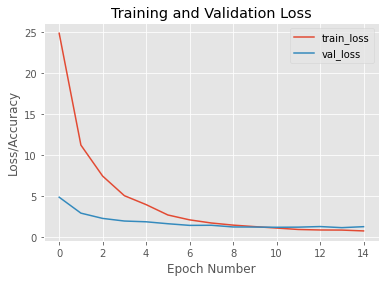

In [133]:
import matplotlib.pyplot as plt
N = 15
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch Number")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
#plt.savefig(args["plot"])



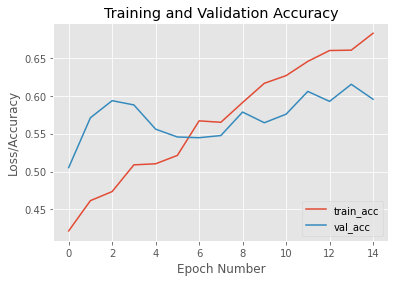

In [134]:

plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch Number")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower right")
#plt.savefig(args["plot"])

In [ ]:
# serialize the model to disk
print("[INFO] saving model...")
model.save("ocular_model", save_format="h5")